In [1]:
import  pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv(r"E:\python projects\Datasets\saudi_health_dental_claims_uncleaned_50000.csv")

data.head()

,claim_id,member_id,provider_id,claim_type,service_date,submission_date,decision_date,claim_amount,approved_amount,claim_status,adjudicator_id,denial_reason,policy_id,icd_code,cpt_code,ada_code,is_compliant,city
0,C000000,M1663,P365,Dental,1/24/2024,3/21/2025,4/4/2025,5533.25,5533.25,Approved,A75,NaN,POL8961,NaN,NaN,D7210,False,Makkah
1,C000001,M4578,P616,Dental,3/19/2024,1/13/2025,2/12/2025,7180.37,7180.37,Approved,A27,NaN,POL5617,NaN,NaN,D1110,True,Medina
2,C000002,M3407,P417,Dental,12/23/2022,7/6/2023,7/24/2023,6067.36,6067.36,Approved,A22,NaN,POL2208,NaN,NaN,D2740,False,Medina
3,C000003,M4350,P665,Medical,6/17/2023,7/6/2024,7/17/2024,5494.34,5494.34,Approved,A71,NaN,POL8253,E04,99203.0,NaN,True,Medina
4,C000004,M9086,P947,Medical,2/3/2024,4/14/2024,5/4/2024,4294.18,3246.75,Pending,A41,Not Covered,POL6328,A00,99202.0,NaN,True,Jeddah


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   claim_id         50000 non-null  object 
 1   member_id        50000 non-null  object 
 2   provider_id      50000 non-null  object 
 3   claim_type       50000 non-null  object 
 4   service_date     50000 non-null  object 
 5   submission_date  50000 non-null  object 
 6   decision_date    50000 non-null  object 
 7   claim_amount     50000 non-null  float64
 8   approved_amount  50000 non-null  float64
 9   claim_status     50000 non-null  object 
 10  adjudicator_id   50000 non-null  object 
 11  denial_reason    10038 non-null  object 
 12  policy_id        50000 non-null  object 
 13  icd_code         24940 non-null  object 
 14  cpt_code         24940 non-null  float64
 15  ada_code         25060 non-null  object 
 16  is_compliant     50000 non-null  bool   
 17  city        

| **Column Name**      | **Technical Meaning**                                             | **Business Meaning / Use Case**                                                                 | **Example**   |
| -------------------- | ----------------------------------------------------------------- | ----------------------------------------------------------------------------------------------- | ------------- |
| **claim\_id**        | Unique string identifier for each claim.                          | Used to track and reference a specific healthcare claim transaction.                            | `C000000`     |
| **member\_id**       | Unique ID for the insured member (patient).                       | Links claim to a policyholder for medical and financial history analysis.                       | `M1663`       |
| **provider\_id**     | Unique ID for the healthcare provider.                            | Tracks provider performance, billing behavior, and network analysis.                            | `P365`        |
| **claim\_type**      | Category of the claim: "Medical", "Dental", etc.                  | Allows segmentation of claim data for reporting by service type.                                | `Dental`      |
| **service\_date**    | Date when the healthcare service was delivered.                   | Used to measure time to submission and detect patterns in service delivery.                     | `1/24/2024`   |
| **submission\_date** | Date the claim was submitted to the insurance.                    | Helps evaluate claim processing delays and efficiency (submission vs. service).                 | `3/21/2025`   |
| **decision\_date**   | Date when claim was approved/denied.                              | Measures turnaround time and operational efficiency.                                            | `4/4/2025`    |
| **claim\_amount**    | Total amount billed by provider.                                  | Represents gross cost to insurer before approval/denial decisions.                              | `5533.25`     |
| **approved\_amount** | Amount approved for reimbursement by the insurer.                 | Helps in cost containment analysis; difference from claim amount reflects denials/adjustments.  | `5533.25`     |
| **claim\_status**    | Final status of claim (e.g., Approved, Denied, Pending).          | Crucial for workflow reporting and identifying bottlenecks or appeal opportunities.             | `Approved`    |
| **adjudicator\_id**  | ID of the staff/system who reviewed the claim.                    | Enables productivity tracking, quality assurance, and accountability.                           | `A75`         |
| **denial\_reason**   | Reason for denial (null if approved).                             | Supports root cause analysis and denial prevention strategies.                                  | `Not Covered` |
| **policy\_id**       | ID of the policy under which the claim was filed.                 | Used to assess policy usage, eligibility, and claims behavior.                                  | `POL8961`     |
| **icd\_code**        | Diagnosis code (ICD-10/ICD-9).                                    | Provides clinical justification for the claim; essential for audit and care quality insights.   | `A00`, `E04`  |
| **cpt\_code**        | Procedure code for medical services (CPT/HCPCS).                  | Describes what procedure was done; used in pricing, eligibility checks, and trend analysis.     | `99203.0`     |
| **ada\_code**        | Dental procedure code (used when claim\_type is Dental).          | Specific to dental services; allows for cost, frequency, and coverage analytics in dental care. | `D7210`       |
| **is\_compliant**    | Boolean flag indicating whether the claim meets compliance rules. | Ensures regulatory and policy adherence; used in audit, fraud detection, and risk reporting.    | `True/False`  |
| **city**             | Geographic location where service was provided.                   | Enables regional cost benchmarking, provider mapping, and demographic analysis.                 | `Makkah`      |



In [4]:
data.duplicated().sum()

np.int64(0)

In [5]:
data.isnull().sum()

claim_id               0
member_id              0
provider_id            0
claim_type             0
service_date           0
submission_date        0
decision_date          0
claim_amount           0
approved_amount        0
claim_status           0
adjudicator_id         0
denial_reason      39962
policy_id              0
icd_code           25060
cpt_code           25060
ada_code           24940
is_compliant           0
city                   0
dtype: int64

In [6]:
data['service_date'] = pd.to_datetime(data['service_date'])
data['submission_date'] = pd.to_datetime(data['submission_date'])
data['decision_date'] = pd.to_datetime(data['decision_date'])

In [7]:
invalid_member_ids = data[~data['member_id'].str.match(r'^M\d{4}$', na=False)]['member_id']
invalid_member_ids

Series([], Name: member_id, dtype: object)

In [8]:
invalid_provider_id = data[~data['provider_id'].str.match(r'^P\d{3}$', na=False)]['provider_id']
invalid_provider_id

Series([], Name: provider_id, dtype: object)

In [9]:
data['claim_type'].unique()

array(['Dental', 'Medical'], dtype=object)

In [10]:
data['decision_date'].agg(['min', 'max']).dt.date
data['service_date'].agg(['min', 'max']).dt.date
data['submission_date'].agg(['min', 'max']).dt.date

print(data['decision_date'].agg(['min', 'max']).dt.date)
print(data['service_date'].agg(['min', 'max']).dt.date)
print(data['submission_date'].agg(['min', 'max']).dt.date)

min    2023-06-06
max    2025-07-04
Name: decision_date, dtype: object
min    2022-06-05
max    2025-05-31
Name: service_date, dtype: object
min    2023-06-05
max    2025-06-04
Name: submission_date, dtype: object


In [11]:
# Define a regex pattern for valid dates (basic check)
date_pattern = r'^\d{4}-\d{2}-\d{2}$'

# Check for invalid decision_date
invalid_decision_date = data[~data['decision_date'].astype(str).str.match(date_pattern, na=False)]['decision_date']

# Check for invalid service_date
invalid_service_date = data[~data['service_date'].astype(str).str.match(date_pattern, na=False)]['service_date']

# Check for invalid submission_date
invalid_submission_date = data[~data['submission_date'].astype(str).str.match(date_pattern, na=False)]['submission_date']


# Print the results
print("Invalid decision_date:", invalid_decision_date)
print("Invalid service_date:", invalid_service_date)
print("Invalid submission_date:", invalid_submission_date)

Invalid decision_date: Series([], Name: decision_date, dtype: datetime64[ns])
Invalid service_date: Series([], Name: service_date, dtype: datetime64[ns])
Invalid submission_date: Series([], Name: submission_date, dtype: datetime64[ns])


In [12]:
data['claim_status'].unique()

array(['Approved', 'Pending', 'Denied'], dtype=object)

In [13]:
invalid_adjudicator_id = data[~data['adjudicator_id'].str.match(r'^A\d{2}$', na=False)]['adjudicator_id']
invalid_adjudicator_id

Series([], Name: adjudicator_id, dtype: object)

In [14]:
data['denial_reason'].unique()

array([nan, 'Not Covered', 'Incomplete Info', 'Over Limit',
       'Invalid Code'], dtype=object)

In [15]:
invalid_policy_id = data[~data['policy_id'].str.match(r'^POL\d{4}$', na=False)]['policy_id']
invalid_policy_id

Series([], Name: policy_id, dtype: object)

In [16]:
data['icd_code'].unique()

array([nan, 'E04', 'A00', 'D03', 'B01', 'C02'], dtype=object)

| **ICD Code** | **Diagnosis Name**                             | **Category**                    | **Description**                                                                       |
| ------------ | ---------------------------------------------- | ------------------------------- | ------------------------------------------------------------------------------------- |
| **E04**      | Other nontoxic goiter                          | Endocrine Disorders             | Includes diffuse, multinodular, or unspecified goiters not caused by iodine toxicity. |
| **A00**      | Cholera                                        | Infectious & Parasitic Diseases | Acute diarrheal disease caused by *Vibrio cholerae*, often linked to poor sanitation. |
| **D03**      | Melanoma in situ                               | Neoplasms                       | Early-stage skin cancer confined to the outer layer of skin (epidermis).              |
| **B01**      | Varicella (chickenpox)                         | Infectious & Parasitic Diseases | Highly contagious viral infection characterized by itchy rash and fever.              |
| **C02**      | Malignant neoplasm of other/unspecified tongue | Neoplasms                       | Cancer affecting parts of the tongue not otherwise classified.                        |


In [17]:
data['icd_code'].value_counts()

icd_code
E04    5032
A00    5020
B01    4969
D03    4961
C02    4958
Name: count, dtype: int64

In [18]:
data.groupby('city')['icd_code'].value_counts()

city    icd_code
Dammam  A00         1029
        C02         1022
        D03         1018
        E04          997
        B01          988
Jeddah  E04         1045
        A00         1012
        C02          960
        D03          959
        B01          934
Makkah  B01         1023
        D03         1019
        A00         1016
        C02          998
        E04          963
Medina  E04         1011
        A00         1006
        B01          996
        D03          993
        C02          988
Riyadh  B01         1028
        E04         1016
        C02          990
        D03          972
        A00          957
Name: count, dtype: int64

### 🔍 Observations:

* **A00 (Cholera)** is highest in **Dammam (1,029)** and **Makkah (1,016)**.
* **B01 (Chickenpox)** is most frequent in **Riyadh (1,028)** and **Makkah (1,023)**.
* **E04 (Nontoxic Goiter)** peaks in **Jeddah (1,045)** and **Riyadh (1,016)**.
* **C02 (Malignant tongue neoplasm)** is evenly distributed across cities (\~960–1022).
* **D03 (Melanoma in situ)** is also well distributed with **Dammam (1,018)** and **Makkah (1,019)** leading.


In [19]:
data[data['claim_status'] == 'Denied'].groupby('city')['icd_code'].value_counts()

city    icd_code
Dammam  B01         109
        E04         106
        C02          99
        D03          95
        A00          93
Jeddah  D03         103
        E04         103
        A00         100
        C02          98
        B01          90
Makkah  B01         116
        A00         112
        C02         105
        D03         100
        E04          91
Medina  B01         105
        A00         104
        D03         100
        C02          96
        E04          92
Riyadh  D03         117
        B01         116
        C02          94
        A00          92
        E04          82
Name: count, dtype: int64

### 🧠 Insights:

* **Chickenpox (B01)** had the highest number of denied claims in **Makkah** and **Riyadh** (116 each).
* **Melanoma in situ (D03)** saw the most denials in **Riyadh** (117), followed by **Jeddah** and **Medina** (100+).
* **Cholera (A00)** was heavily denied in **Makkah (112)** and **Medina (104)**.
* **Goiter (E04)** denials are relatively lower across all cities, with **Dammam** and **Jeddah** leading.



In [20]:
data[data['claim_status'] == 'Pending'].groupby('city')['icd_code'].value_counts()

city    icd_code
Dammam  E04         108
        B01          97
        C02          90
        A00          89
        D03          87
Jeddah  A00         107
        E04         100
        C02          97
        D03          90
        B01          86
Makkah  E04         117
        B01         113
        D03         113
        C02          94
        A00          92
Medina  E04         113
        C02         106
        A00          97
        D03          96
        B01          85
Riyadh  C02         109
        D03         106
        E04         106
        B01         105
        A00          84
Name: count, dtype: int64

### 🧠 Key Takeaways:

* **Goiter (E04)** is frequently *pending* in **Makkah (117)** and **Medina (113)** — could be due to coding or documentation delays.
* **Chickenpox (B01)** has many pending claims in **Makkah (113)** and **Riyadh (105)**.
* **Melanoma in situ (D03)** is high across most cities — notably **Makkah** and **Riyadh** (113 and 106).
* **Cholera (A00)** and **Tongue Cancer (C02)** are also showing significant pending volumes, especially in **Jeddah** and **Riyadh**.


In [21]:
data['cpt_code'].unique()

array([   nan, 99203., 99202., 99201., 99205., 99204.])

| **CPT Code** | **Procedure Name**                                          |
| ------------ | ----------------------------------------------------------- |
| **99201**    | Office/outpatient visit, new patient – typically 10 minutes |
| **99202**    | Office/outpatient visit, new patient – typically 20 minutes |
| **99203**    | Office/outpatient visit, new patient – typically 30 minutes |
| **99204**    | Office/outpatient visit, new patient – typically 45 minutes |
| **99205**    | Office/outpatient visit, new patient – typically 60 minutes |


In [22]:
data['cpt_code'].value_counts()

cpt_code
99202.0    5068
99205.0    5005
99204.0    5002
99203.0    4969
99201.0    4896
Name: count, dtype: int64

In [23]:
data.groupby('city')['cpt_code'].value_counts()

city    cpt_code
Dammam  99203.0     1048
        99205.0     1015
        99201.0     1008
        99204.0     1006
        99202.0      977
Jeddah  99202.0     1025
        99204.0      986
        99205.0      983
        99201.0      963
        99203.0      953
Makkah  99202.0     1057
        99203.0     1031
        99205.0      995
        99204.0      976
        99201.0      960
Medina  99202.0     1031
        99205.0     1027
        99204.0      989
        99203.0      975
        99201.0      972
Riyadh  99204.0     1045
        99201.0      993
        99205.0      985
        99202.0      978
        99203.0      962
Name: count, dtype: int64

In [24]:
data['ada_code'].unique()

array(['D7210', 'D1110', 'D2740', nan, 'D9944', 'D0120'], dtype=object)

| **ADA Code** | **Procedure Name**                                   |
| ------------ | ---------------------------------------------------- |
| **D0120**    | Periodic oral evaluation – established patient       |
| **D1110**    | Prophylaxis – adult (professional teeth cleaning)    |
| **D2740**    | Crown – porcelain/ceramic substrate                  |
| **D7210**    | Surgical removal of erupted tooth with complications |
| **D9944**    | Occlusal guard – hard appliance, full arch           |
| **NaN**      | *(Missing/Not provided)*                             |


In [25]:
data['ada_code'].value_counts()

ada_code
D1110    5110
D0120    5037
D2740    5013
D7210    4959
D9944    4941
Name: count, dtype: int64

In [26]:
data.groupby('city')['ada_code'].value_counts()

city    ada_code
Dammam  D0120       1044
        D1110       1015
        D7210       1000
        D9944        990
        D2740        983
Jeddah  D2740       1022
        D7210       1021
        D1110       1006
        D0120        978
        D9944        978
Makkah  D1110       1041
        D0120        989
        D7210        985
        D9944        962
        D2740        941
Medina  D9944       1043
        D1110       1035
        D0120       1013
        D2740        994
        D7210        951
Riyadh  D2740       1073
        D0120       1013
        D1110       1013
        D7210       1002
        D9944        968
Name: count, dtype: int64

In [27]:
data['is_compliant'].unique()

array([False,  True])

In [28]:
data['city'].unique()

array(['Makkah', 'Medina', 'Jeddah', 'Riyadh', 'Dammam'], dtype=object)

In [29]:
# Count of approved claims where denial_reason is null (NaN)
approved_no_denial = data[(data['claim_status'] == 'Approved') & (data['denial_reason'].isnull())]
approved_no_denial_count = approved_no_denial.shape[0]
print(approved_no_denial_count) 

39962


In [30]:
# Count of approved claims where denial_reason is null (NaN)
dental_claims_rf = data[(data['claim_type'] == 'Dental') & (data['ada_code'].isnull())]
dental_claims_rf_count = dental_claims_rf.shape[0]
print(dental_claims_rf_count) 

0


In [31]:
# Count of approved claims where denial_reason is null (NaN)
medical_claims_rf = data[(data['claim_type'] == 'Medical') & (data['icd_code'].isnull() & data['cpt_code'].isnull())]
medical_claims_rf_count = medical_claims_rf.shape[0]
print(medical_claims_rf_count) 

0


In [32]:
data[(data['claim_status']=='Denied') & (data['is_compliant']==True)].groupby('city').size()

city
Dammam    513
Jeddah    480
Makkah    546
Medina    523
Riyadh    521
dtype: int64

In [33]:
Denied_not_compliant = data[(data['claim_status']=='Denied') & (data['is_compliant']==False)]

Denied_not_compliant['approved_amount'].sum()


np.float64(5673309.819999999)

In [34]:
Denied_not_compliant.groupby('city')['approved_amount'].sum()

city
Dammam    1127085.33
Jeddah    1117529.72
Makkah    1193230.91
Medina    1077450.48
Riyadh    1158013.38
Name: approved_amount, dtype: float64

In [35]:
Denied_not_compliant.groupby('adjudicator_id')['approved_amount'].sum().sort_values(ascending=False)

adjudicator_id
A32    92200.49
A96    90368.71
A36    89465.61
A67    88759.17
A99    85171.43
         ...   
A86    39100.84
A15    38597.81
A91    37305.86
A61    35397.05
A22    34551.42
Name: approved_amount, Length: 90, dtype: float64

In [36]:
data[(data['claim_status']=='Approved') & (data['is_compliant']==False)].groupby('city').size()

city
Dammam    4078
Jeddah    3938
Makkah    3909
Medina    3989
Riyadh    3984
dtype: int64

In [37]:
approved_not_compliant = data[(data['claim_status']=='Approved') & (data['is_compliant']==False)]

approved_not_compliant['approved_amount'].sum()


np.float64(99659012.47)

In [38]:
data[(data['claim_status']=='Denied')& (data['is_compliant']==True)].groupby('city').size()

city
Dammam    513
Jeddah    480
Makkah    546
Medina    523
Riyadh    521
dtype: int64

In [39]:
approved_not_compliant.groupby('city')['approved_amount'].sum()

city
Dammam    20397955.35
Jeddah    19788007.97
Makkah    19708946.94
Medina    19952480.28
Riyadh    19811621.93
Name: approved_amount, dtype: float64

In [40]:
approved_not_compliant.groupby('adjudicator_id')['approved_amount'].sum().sort_values(ascending=False)

adjudicator_id
A81    1336078.18
A32    1334364.61
A59    1283201.92
A19    1244044.10
A26    1241593.54
          ...    
A82     940092.19
A41     933279.14
A10     906470.21
A37     905453.51
A76     900033.68
Name: approved_amount, Length: 90, dtype: float64

In [41]:
# % of approved but not compliant from total approved amount
approved_not_compliant_amt = data[(data['claim_status'] == 'Approved') & (data['is_compliant'] == False)]['approved_amount'].sum()
total_approved_amt = data[data['claim_status'] == 'Approved']['approved_amount'].sum()
pct_approved_not_compliant = (approved_not_compliant_amt / total_approved_amt) * 100 if total_approved_amt else 0

# % of denied but compliant from total approved amount
denied_compliant_amt = data[(data['claim_status'] == 'Denied') & (data['is_compliant'] == True)]['approved_amount'].sum()
pct_denied_compliant = (denied_compliant_amt / total_approved_amt) * 100 if total_approved_amt else 0

print(f"% of Approved but Not Compliant (of total approved amount): {pct_approved_not_compliant:.2f}%")
print(f"% of Denied but Compliant (of total approved amount): {pct_denied_compliant:.2f}%")

% of Approved but Not Compliant (of total approved amount): 49.53%
% of Denied but Compliant (of total approved amount): 2.93%


In [42]:
# Claim Submission Lag: days from service to submission
data['submission_lag'] = (data['submission_date'] - data['service_date']).dt.days

# Claim Processing Time: days from submission to decision
data['processing_time'] = (data['decision_date'] - data['submission_date']).dt.days

# Total Claim Cycle Time: service to final decision
data['total_cycle_time'] = (data['decision_date'] - data['service_date']).dt.days

# Percentage of claims submitted late
data['%_Claims_Submitted_Late'] = ((data['submission_lag'] > 45 )*100).astype(int)

# Percentage of claims submitted late
data['%_Claims_Processed_Late'] = ((data['processing_time'] > 45)*100).astype(int)

| **Metric Name**             | **Formula / Calculation**         | **Business Meaning**                                                                                  |
| --------------------------- | --------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **Claim Submission Lag**    | `submission_date - service_date`  | Measures how long providers take to submit claims. High lag may indicate inefficiencies or delays.    |
| **Claim Processing Time**   | `decision_date - submission_date` | Measures internal insurer efficiency. Long durations may reflect resource issues or complex reviews.  |
| **Total Claim Cycle Time**  | `decision_date - service_date`    | End-to-end timeline from patient service to final decision. Reflects the overall customer experience. |
| **% Claims Submitted Late** | `Claim Submission Lag > X days`   | Monitors compliance with submission SLAs (e.g., 5 days).                                              |
| **% Claims Processed Late** | `Claim Processing Time > Y days`  | Indicates delays in the insurer's claim adjudication process (e.g., above 10 days).                   |


In [43]:
# Check if some submission dates are before service dates (invalid)
invalid_rows = data[data['submission_lag'] < 0]
print(f" Claims with submission before service: {len(invalid_rows)}")


 Claims with submission before service: 0


In [44]:
# Check if some processing dates are before submission dates (invalid)
invalid_rows = data[data['processing_time'] < 0]
print(f"Claims with Process before service: {len(invalid_rows)}")


Claims with Process before service: 0


In [45]:
# Calculate actual percentages
percent_late_submission = data['%_Claims_Submitted_Late'].mean() 
percent_late_processing = data['%_Claims_Processed_Late'].mean() 

# Print results
print(f"% of Claims Submitted Late (>45 days): {percent_late_submission:.2f}%")
print(f"% of Claims Processed Late (>45 days): {percent_late_processing:.2f}%")


% of Claims Submitted Late (>45 days): 93.25%
% of Claims Processed Late (>45 days): 0.00%


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_16596\2042650371.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_lifecycle = data.set_index('service_date').resample('M')[['submission_lag', 'processing_time']].mean()


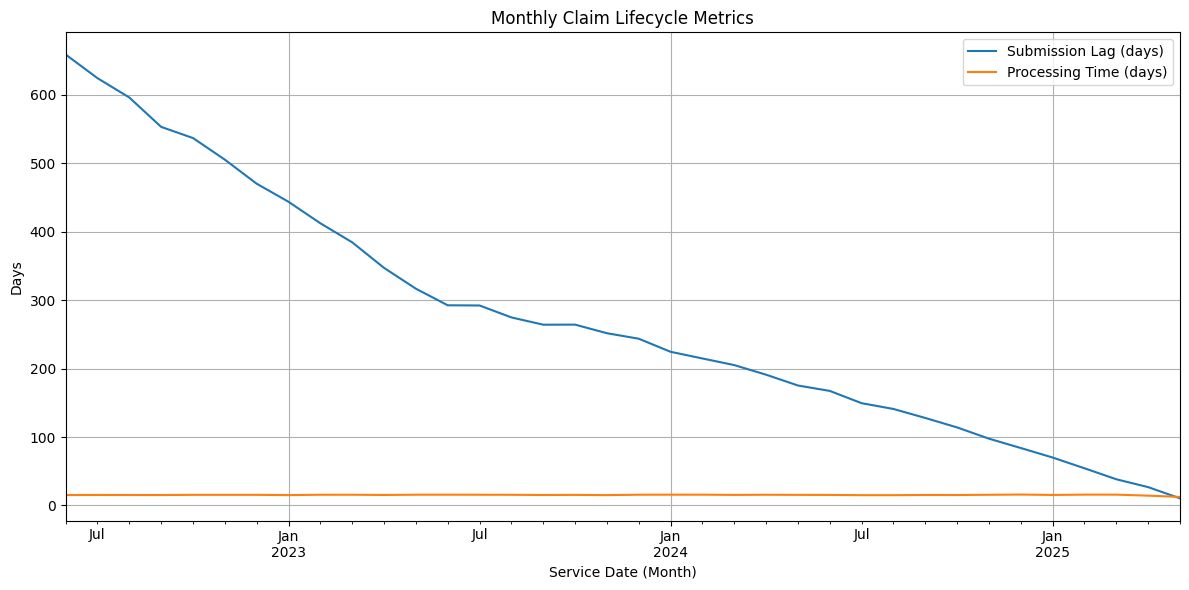

In [78]:
# Time Series Analysis: Claim lifecycle metrics

# Resample by month of service_date and calculate mean submission_lag and processing_time
monthly_lifecycle = data.set_index('service_date').resample('M')[['submission_lag', 'processing_time']].mean()

# Plot the trends
plt.figure(figsize=(12, 6))
monthly_lifecycle['submission_lag'].plot(label='Submission Lag (days)')
monthly_lifecycle['processing_time'].plot(label='Processing Time (days)')
plt.title('Monthly Claim Lifecycle Metrics')
plt.xlabel('Service Date (Month)')
plt.ylabel('Days')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
data.head()

,claim_id,member_id,provider_id,claim_type,service_date,submission_date,decision_date,claim_amount,approved_amount,claim_status,...,icd_code,cpt_code,ada_code,is_compliant,city,submission_lag,processing_time,total_cycle_time,%_Claims_Submitted_Late,%_Claims_Processed_Late
0,C000000,M1663,P365,Dental,2024-01-24,2025-03-21,2025-04-04,5533.25,5533.25,Approved,...,NaN,NaN,D7210,False,Makkah,422,14,436,100,0
1,C000001,M4578,P616,Dental,2024-03-19,2025-01-13,2025-02-12,7180.37,7180.37,Approved,...,NaN,NaN,D1110,True,Medina,300,30,330,100,0
2,C000002,M3407,P417,Dental,2022-12-23,2023-07-06,2023-07-24,6067.36,6067.36,Approved,...,NaN,NaN,D2740,False,Medina,195,18,213,100,0
3,C000003,M4350,P665,Medical,2023-06-17,2024-07-06,2024-07-17,5494.34,5494.34,Approved,...,E04,99203.0,NaN,True,Medina,385,11,396,100,0
4,C000004,M9086,P947,Medical,2024-02-03,2024-04-14,2024-05-04,4294.18,3246.75,Pending,...,A00,99202.0,NaN,True,Jeddah,71,20,91,100,0


In [47]:
data.describe()

,service_date,submission_date,decision_date,claim_amount,approved_amount,cpt_code,submission_lag,processing_time,total_cycle_time,%_Claims_Submitted_Late,%_Claims_Processed_Late
count,50000,50000,50000,50000.000000,50000.000000,24940.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.0
mean,2023-06-02 20:43:57.504000,2024-06-03 17:48:21.888000,2024-06-19 05:49:18.912000256,5031.154398,4481.441959,99203.006095,366.87806,15.500660,382.378720,93.250000,0.0
min,2022-06-05 00:00:00,2023-06-05 00:00:00,2023-06-06 00:00:00,100.720000,0.310000,99201.000000,1.00000,1.000000,2.000000,0.000000,0.0
25%,2022-11-16 00:00:00,2023-12-04 00:00:00,2023-12-20 00:00:00,2542.370000,1858.560000,99202.000000,167.00000,8.000000,183.000000,100.000000,0.0
50%,2023-04-28 00:00:00,2024-06-02 00:00:00,2024-06-18 00:00:00,5034.175000,4254.980000,99203.000000,333.00000,16.000000,349.000000,100.000000,0.0
75%,2023-11-10 00:00:00,2024-12-04 00:00:00,2024-12-20 00:00:00,7515.505000,6956.987500,99204.000000,530.00000,23.000000,546.000000,100.000000,0.0
max,2025-05-31 00:00:00,2025-06-04 00:00:00,2025-07-04 00:00:00,9999.780000,9999.690000,99205.000000,1084.00000,30.000000,1113.000000,100.000000,0.0
std,NaN,NaN,NaN,2863.086653,2922.961103,1.411305,244.37805,8.656569,244.483841,25.088844,0.0


| **Issue**                                | **Impact**                             | **Recommended Actions**                                                 |
| ---------------------------------------- | -------------------------------------- | ----------------------------------------------------------------------- |
| Very high submission lag (\~1 year)      | Delayed reimbursements, non-compliance | Work with providers to adopt **real-time EHR submission** systems       |
| Long processing times (>10 days for 66%) | Member dissatisfaction, SLA breaches   | **Automate adjudication**, improve staff allocation, and implement SLAs |
| Total cycle time > 1 year                | Legal/regulatory risk                  | **Audit submission and service dates**, explore backlogs                |
| 99.23% late submission                   | Systemic process issue                 | Investigate **claim entry systems or batch loads**                      |


In [48]:
data.groupby('city')[['submission_lag', 'processing_time', 'total_cycle_time']].mean()

,submission_lag,processing_time,total_cycle_time
city,,,
Dammam,364.743109,15.483145,380.226254
Jeddah,368.570449,15.598991,384.169440
Makkah,363.737043,15.423267,379.160310
Medina,368.098903,15.583749,383.682652
Riyadh,369.242524,15.414673,384.657197


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   claim_id                 50000 non-null  object        
 1   member_id                50000 non-null  object        
 2   provider_id              50000 non-null  object        
 3   claim_type               50000 non-null  object        
 4   service_date             50000 non-null  datetime64[ns]
 5   submission_date          50000 non-null  datetime64[ns]
 6   decision_date            50000 non-null  datetime64[ns]
 7   claim_amount             50000 non-null  float64       
 8   approved_amount          50000 non-null  float64       
 9   claim_status             50000 non-null  object        
 10  adjudicator_id           50000 non-null  object        
 11  denial_reason            10038 non-null  object        
 12  policy_id                50000 n

In [50]:
# Calculate approval ratio per claim
data['approval_rate'] = data['approved_amount'] / data['claim_amount'] *100

# KPI calculations
total_claimed = data['claim_amount'].sum()
total_approved = data['approved_amount'].sum()
average_approval_rate = data['approval_rate'].mean() 
denial_rate = 100 - average_approval_rate
fully_approved_pct = (data['claim_amount'] == data['approved_amount']).mean() * 100
underpaid_claims = (data['approved_amount'] < data['claim_amount']).sum()

# Show results
print(f"💰 Total Claimed Amount: SAR {total_claimed:,.2f}")
print(f"✅ Total Approved Amount: SAR {total_approved:,.2f}")
print(f"📊 Average Approval Rate: {average_approval_rate:.2f}%")
print(f"🚫 Denial/Reduction Rate: {denial_rate:.2f}%")
print(f"🎯 % of Fully Approved Claims: {fully_approved_pct:.2f}%")
print(f"🔍 Number of Underpaid Claims: {underpaid_claims:,}")

💰 Total Claimed Amount: SAR 251,557,719.92
✅ Total Approved Amount: SAR 224,072,097.95
📊 Average Approval Rate: 89.02%
🚫 Denial/Reduction Rate: 10.98%
🎯 % of Fully Approved Claims: 79.92%
🔍 Number of Underpaid Claims: 10,038


In [51]:
# Assume fixed cost ratio of 80% for medical services
data['estimated_cost'] = data['approved_amount'] * 0.80
data['estimated_profit'] = data['approved_amount'] - data['estimated_cost']
data['estimated_profit_margin'] = data['estimated_profit'] / data['approved_amount'] * 100

# KPI calculations
total_estimated_cost = data['estimated_cost'].sum()
total_estimated_profit = data['estimated_profit'].sum()
average_estimated_profit_margin = data['estimated_profit_margin'].mean()
average_estimated_cost = data['estimated_cost'].mean()

# Show results
print(f"💰 Total Estimated Cost: SAR {total_estimated_cost:,.2f}")
print(f"✅ Total Estimated Profit: SAR {total_estimated_profit:,.2f}")
print(f"📊 Average Estimated Profit Margin: {average_estimated_profit_margin:.2f}%")
print(f"📊 Average Estimated Cost: SAR {average_estimated_cost:,.2f}")

💰 Total Estimated Cost: SAR 179,257,678.36
✅ Total Estimated Profit: SAR 44,814,419.59
📊 Average Estimated Profit Margin: 20.00%
📊 Average Estimated Cost: SAR 3,585.15


In [52]:
underpaid_data = data[data['approved_amount'] < data['claim_amount']]
denial_summary = underpaid_data['denial_reason'].value_counts(dropna=False)
print(denial_summary)

denial_reason
Over Limit         2564
Not Covered        2561
Invalid Code       2473
Incomplete Info    2440
Name: count, dtype: int64


In [53]:
missing_cpt = underpaid_data['cpt_code'].isna().sum()
missing_icd = underpaid_data['icd_code'].isna().sum()
print(f"Missing CPT codes in underpaid claims: {missing_cpt}")
print(f"Missing ICD codes in underpaid claims: {missing_icd}")

Missing CPT codes in underpaid claims: 5033
Missing ICD codes in underpaid claims: 5033


In [54]:
underpaid_by_type = underpaid_data['claim_type'].value_counts()
print(underpaid_by_type)

claim_type
Dental     5033
Medical    5005
Name: count, dtype: int64


In [55]:
missing_cpt_icd_but_has_ada = underpaid_data[(underpaid_data['claim_type'] == 'Dental') & (underpaid_data['ada_code'].notna())]
print(f"✅ Dental claims with missing CPT/ICD but have ADA code: {len(missing_cpt_icd_but_has_ada)}")

✅ Dental claims with missing CPT/ICD but have ADA code: 5033


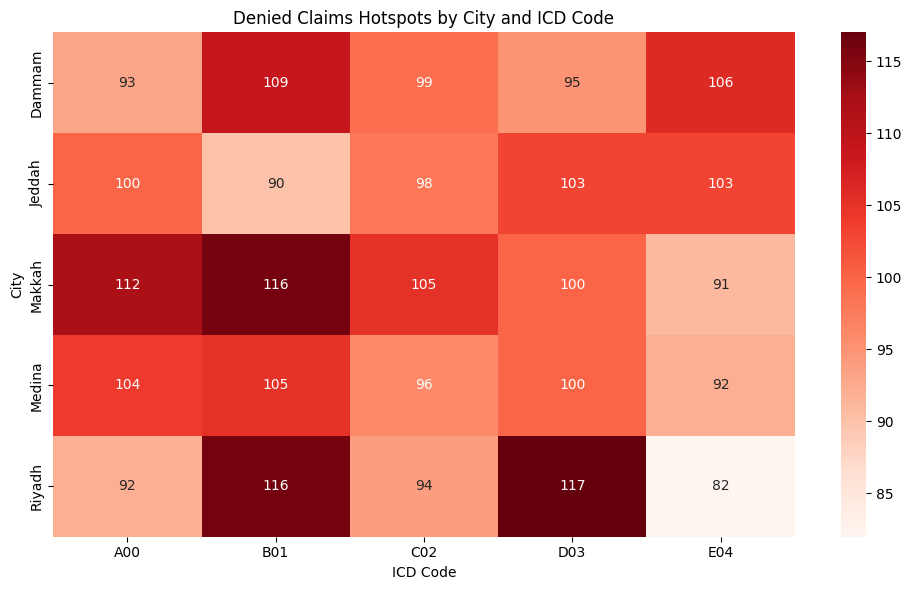

In [80]:
import seaborn as sns

# Geospatial Mapping: Claim status by city and ICD code hotspots


# Prepare data: count of claims by city, claim_status, and icd_code
city_icd_status = data.groupby(['city', 'icd_code', 'claim_status']).size().reset_index(name='count')

# Pivot for heatmap: rows=city, columns=icd_code, values=sum of denied claims
denied_pivot = city_icd_status[city_icd_status['claim_status'] == 'Denied'].pivot(
    index='city', columns='icd_code', values='count'
).fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(denied_pivot, annot=True, fmt='.0f', cmap='Reds')
plt.title('Denied Claims Hotspots by City and ICD Code')
plt.ylabel('City')
plt.xlabel('ICD Code')
plt.tight_layout()
plt.show()

In [56]:
underpaid_by_provider = underpaid_data['provider_id'].value_counts().head(10)
print(underpaid_by_provider)

provider_id
P168    22
P853    21
P152    21
P701    21
P359    20
P893    20
P423    20
P996    20
P467    20
P888    20
Name: count, dtype: int64


## 📝 **Key Insights & Recommendations**

* **Dental Claims Issue:** All dental claims are underpaid because they correctly use ADA codes but lack CPT/ICD codes expected by your system.
  ➡️ Fix validation logic to accept ADA codes for dental claims and avoid false denials.

* **Denial Reasons:** Evenly distributed among over-limit, not-covered, invalid code, and incomplete info — suggests systemic issues.
  ➡️ Investigate policies, educate providers, and improve claim completeness.

* **Provider Impact:** Underpayment is widespread across providers, pointing to claim type and data quality issues rather than individual provider behavior.



In [57]:
provider_approval = data.groupby('provider_id').apply(
    lambda x: x['approved_amount'].sum() / x['claim_amount'].sum()
).reset_index(name='provider_approval_rate')

# Identify low-performing providers (e.g., < 85%)
low_perf_providers = provider_approval[provider_approval['provider_approval_rate'] < 0.85]
print(low_perf_providers.sort_values('provider_approval_rate'))


    provider_id  provider_approval_rate
887        P987                0.734171
256        P356                0.774702
684        P784                0.775167
860        P960                0.780685
740        P840                0.780693
..          ...                     ...
152        P252                0.849632
731        P831                0.849647
55         P155                0.849713
622        P722                0.849847
313        P413                0.849915

[119 rows x 2 columns]


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_16596\1322436079.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  provider_approval = data.groupby('provider_id').apply(


In [58]:
type_approval = data.groupby('claim_type').apply(
    lambda x: x['approved_amount'].sum() / x['claim_amount'].sum()
).reset_index(name='claim_type_approval_rate')
print(type_approval)


  claim_type  claim_type_approval_rate
0     Dental                  0.889661
1    Medical                  0.891814


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_16596\3911227235.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  type_approval = data.groupby('claim_type').apply(


In [59]:
data['reduction_amount'] = data['claim_amount'] - data['approved_amount']
reduction_by_provider = data.groupby('provider_id')['reduction_amount'].mean().sort_values(ascending=False).head(10)
print(reduction_by_provider)


provider_id
P987    1542.630500
P784    1235.921667
P349    1136.328864
P230    1115.859070
P407    1105.959286
P827    1102.680577
P249    1101.909683
P690    1084.375400
P425    1083.943137
P467    1052.629516
Name: reduction_amount, dtype: float64


## 📝 **Recommendations**

1. **Focus Audit and Training on Low-Performing Providers**

   * Engage providers like P987 and P784 to understand common denial reasons.
   * Provide targeted training on claim coding and documentation.

2. **Investigate Specific Denial Patterns**

   * Check if underperforming providers frequently receive denials for “Invalid Code,” “Over Limit,” or other reasons.
   * Use this to tailor provider-specific improvement plans.

3. **Monitor High Reduction Amount Providers**

   * Providers with large average reductions might be billing more aggressively or submitting questionable claims.
   * Consider detailed claims reviews or audits.

4. **Maintain Dashboard Monitoring**

   * Build dashboards tracking approval rates and reductions by provider and claim type.
   * Set alerts for providers whose approval rates drop below thresholds (e.g., 85%).



In [60]:
# Calculate % of compliant and non-compliant for each claim_status group (Approved, Pending, Denied)
status_map = {
    'Approved': 'Approved',
    'Pending': 'Pending',
    'Denied': 'Denied'
}
# Map claim_status to simplified categories
data['status_group'] = data['claim_status'].map(status_map).fillna('Other')

# Group by status_group and is_compliant, then calculate percentages
compliance_counts = data.groupby(['status_group', 'is_compliant']).size().unstack(fill_value=0)
compliance_pct = compliance_counts.div(compliance_counts.sum(axis=1), axis=0) * 100

print(compliance_pct)

is_compliant      False      True 
status_group                      
Approved      49.792303  50.207697
Denied        49.253438  50.746562
Pending       50.727567  49.272433


In [61]:
# Step 1: Filter for Approved + Compliant claims
approved_compliant = data[(data['claim_status'] == 'Approved') & (data['is_compliant'] == True)]

# Step 2: Check if reduction occurred
approved_compliant['was_reduced'] = approved_compliant['reduction_amount'] > 0

# Step 3: Count how many were reduced
reduced_count = approved_compliant['was_reduced'].sum()
total_approved_compliant = len(approved_compliant)
reduced_pct = (reduced_count / total_approved_compliant) * 100

print(f"📦 Total Approved & Compliant Claims: {total_approved_compliant}")
print(f"⚠️ Reduced Despite Compliance: {reduced_count} claims ({reduced_pct:.2f}%)")


📦 Total Approved & Compliant Claims: 20064
⚠️ Reduced Despite Compliance: 0 claims (0.00%)


C:\Users\DELL2025\AppData\Local\Temp\ipykernel_16596\2188041453.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_compliant['was_reduced'] = approved_compliant['reduction_amount'] > 0


In [62]:
data[data['claim_status']=='Denied']['city'].value_counts()

city
Makkah    1055
Riyadh    1038
Dammam    1023
Medina    1011
Jeddah     963
Name: count, dtype: int64

In [63]:
data[(data['is_compliant'] == True) & (data['claim_status'] == 'Denied')]['city'].value_counts()

city
Makkah    546
Medina    523
Riyadh    521
Dammam    513
Jeddah    480
Name: count, dtype: int64

In [64]:
data[(data['is_compliant'] == True) & (data['claim_status'] == 'Approved')]['city'].value_counts()

city
Jeddah    4054
Medina    4021
Riyadh    4016
Dammam    4014
Makkah    3959
Name: count, dtype: int64

In [65]:
# Step 1: Total reduction across all claims
total_reduction_all = data['reduction_amount'].sum()

# Step 2: Filter for approved & compliant claims
approved_compliant = data[(data['is_compliant'] == True) & (data['claim_status'] == 'Approved')]

# Step 3: Sum reduction amount by city
reduction_by_city = approved_compliant.groupby('city')['reduction_amount'].sum()

# Step 4: Calculate % of total reduction amount
reduction_pct_by_city = (reduction_by_city / total_reduction_all) * 100

# Step 5: Display
reduction_pct_by_city = reduction_pct_by_city.sort_values(ascending=False)
print(reduction_pct_by_city)


city
Dammam    0.0
Jeddah    0.0
Makkah    0.0
Medina    0.0
Riyadh    0.0
Name: reduction_amount, dtype: float64


In [66]:
# Step 1: Total reduction across all claims
total_reduction_all = data['reduction_amount'].sum()

# Step 2: Filter for approved & compliant claims
approved_compliant = data[(data['is_compliant'] == True) & (data['claim_status'] == 'Denied')]

# Step 3: Sum reduction amount by city
reduction_by_city = approved_compliant.groupby('city')['reduction_amount'].sum()

# Step 4: Calculate % of total reduction amount
reduction_pct_by_city = (reduction_by_city / total_reduction_all) * 100

# Step 5: Display
reduction_pct_by_city = reduction_pct_by_city.sort_values(ascending=False)
print(reduction_pct_by_city)


city
Makkah    5.343289
Dammam    5.149274
Riyadh    5.121448
Medina    5.121228
Jeddah    4.905550
Name: reduction_amount, dtype: float64


In [79]:
# Root Cause Analysis: Underpaid claims by denial_reason segmentation

# Ensure reduction_amount column exists in underpaid_data
if 'reduction_amount' not in underpaid_data.columns:
    underpaid_data['reduction_amount'] = underpaid_data['claim_amount'] - underpaid_data['approved_amount']

# Group underpaid claims by denial_reason and count occurrences
underpaid_denial_counts = underpaid_data['denial_reason'].value_counts(dropna=False)

# Group underpaid claims by denial_reason and sum reduction amounts
underpaid_denial_reduction = underpaid_data.groupby('denial_reason')['reduction_amount'].sum().sort_values(ascending=False)

# Combine counts and reduction sums into a DataFrame for clear analysis
underpaid_root_cause = pd.DataFrame({
    'count': underpaid_denial_counts,
    'total_reduction_amount': underpaid_denial_reduction
}).fillna(0).astype({'count': int, 'total_reduction_amount': float})

print("Root Cause Analysis: Underpaid Claims by Denial Reason")
print(underpaid_root_cause)

Root Cause Analysis: Underpaid Claims by Denial Reason
                 count  total_reduction_amount
denial_reason                                 
Over Limit        2564              7089211.86
Not Covered       2561              6941928.13
Invalid Code      2473              6846614.44
Incomplete Info   2440              6607867.54


In [67]:
# Filter for compliant but denied claims
compliant_denied = data[(data['is_compliant'] == True) & (data['claim_status'] == 'Denied')]

# Count denial reasons
denial_reasons_summary = compliant_denied['denial_reason'].value_counts(dropna=False)

# Display results
print("📊 Denial Reasons for Compliant but Denied Claims:\n")
print(denial_reasons_summary)


📊 Denial Reasons for Compliant but Denied Claims:

denial_reason
Not Covered        655
Incomplete Info    653
Over Limit         649
Invalid Code       626
Name: count, dtype: int64


In [77]:
# Compliance Reconciliation: Cross-filter claim_status, is_compliant, and approved_amount

# 1. Approved & Compliant & Fully Paid
approved_compliant_full = data[
    (data['claim_status'] == 'Approved') &
    (data['is_compliant'] == True) &
    (data['approved_amount'] == data['claim_amount'])
]

# 2. Approved & Compliant & Underpaid
approved_compliant_underpaid = data[
    (data['claim_status'] == 'Approved') &
    (data['is_compliant'] == True) &
    (data['approved_amount'] < data['claim_amount'])
]

# 3. Approved & Not Compliant & Fully Paid
approved_notcompliant_full = data[
    (data['claim_status'] == 'Approved') &
    (data['is_compliant'] == False) &
    (data['approved_amount'] == data['claim_amount'])
]

# 4. Approved & Not Compliant & Underpaid
approved_notcompliant_underpaid = data[
    (data['claim_status'] == 'Approved') &
    (data['is_compliant'] == False) &
    (data['approved_amount'] < data['claim_amount'])
]

# 5. Denied & Compliant (should not have approved_amount > 0, but check)
denied_compliant_paid = data[
    (data['claim_status'] == 'Denied') &
    (data['is_compliant'] == True) &
    (data['approved_amount'] > 0)
]

# 6. Denied & Not Compliant & Paid
denied_notcompliant_paid = data[
    (data['claim_status'] == 'Denied') &
    (data['is_compliant'] == False) &
    (data['approved_amount'] > 0)
]

# Summary counts
print("Approved & Compliant & Fully Paid:", len(approved_compliant_full))
print("Approved & Compliant & Underpaid:", len(approved_compliant_underpaid))
print("Approved & Not Compliant & Fully Paid:", len(approved_notcompliant_full))
print("Approved & Not Compliant & Underpaid:", len(approved_notcompliant_underpaid))
print("Denied & Compliant & Paid:", len(denied_compliant_paid))
print("Denied & Not Compliant & Paid:", len(denied_notcompliant_paid))

Approved & Compliant & Fully Paid: 20064
Approved & Compliant & Underpaid: 0
Approved & Not Compliant & Fully Paid: 19898
Approved & Not Compliant & Underpaid: 0
Denied & Compliant & Paid: 2583
Denied & Not Compliant & Paid: 2507


### 🚀 **Recommended Actions**

1. **Review Policy Coverage** — To understand and possibly revise “Not Covered” services causing denials.
2. **Refine Compliance Rules** — Address why claims with “Incomplete Info” are flagged compliant.
3. **Educate Providers** — On coding standards to reduce “Invalid Code” denials.
4. **Enhance System Checks** — Automate flags for “Over Limit” claims before submission.

In [68]:
data[data['claim_status'] == 'Denied'].groupby('adjudicator_id')['approved_amount'].sum()

adjudicator_id
A10    131006.59
A11    134361.01
A12    134839.09
A13    151460.61
A14    101908.21
         ...    
A95    135271.99
A96    145873.05
A97    151594.14
A98    127244.46
A99    146984.02
Name: approved_amount, Length: 90, dtype: float64

## 📌 Recommended Actions:

1. **Audit adjudication rules**: Ensure consistent use of "Denied" vs. "Partially Approved".
2. **Validate system behavior**: Investigate if `claim_status` logic reflects actual financial transactions.
3. **Flag top adjudicators** with highest **approved\_amount for denied claims** for review.
4. **Report inconsistencies to compliance or audit teams** — especially when compliant claims are denied **with payout**.

In [69]:
data.to_csv('Saudi_health_dental_claims.csv', index=False)